In [1]:
import numpy as np
import pandas as pd
import lightkurve as lk
import matplotlib.pyplot as plt
import glob

from utils_cdpp_scaling import scale_cdpp
from utils_magnitude_correction import correct_magnitude
from utils_fixed_lightkurve_functions import estimate_cdpp

In [2]:
# read in target info (excluding group 19)
df = pd.read_csv('data/target_info.csv')[:54]

# sort data by gaia magnitude
sorted_df = df.sort_values(by=['gaia_mag'], ascending=True).reset_index(drop=True)

In [3]:
# arrays for each 
cdpp_30_min = np.asarray(sorted_df.CDPP0_5_med)
mag = np.asarray(sorted_df.gaia_mag)
temp = np.asarray(sorted_df.t_eff)
logg = np.asarray(sorted_df.logg)
fe_h = np.asarray(sorted_df.fe_h)

# scale cdpp via methods in christiansen
cdpp_3_min_scaled = scale_cdpp(30, 3, cdpp_30_min)
cdpp_10_min_scaled = scale_cdpp(30, 10, cdpp_30_min)

In [4]:
# fit curve to each cdpp time and calculate corrected magnitude
curve_fit_3_min, cdpp_3_min_scaled_corrected = correct_magnitude(mag, cdpp_3_min_scaled)
curve_fit_10_min, cdpp_10_min_scaled_corrected = correct_magnitude(mag, cdpp_10_min_scaled)
curve_fit_30_min, cdpp_30_min_corrected = correct_magnitude(mag, cdpp_30_min)

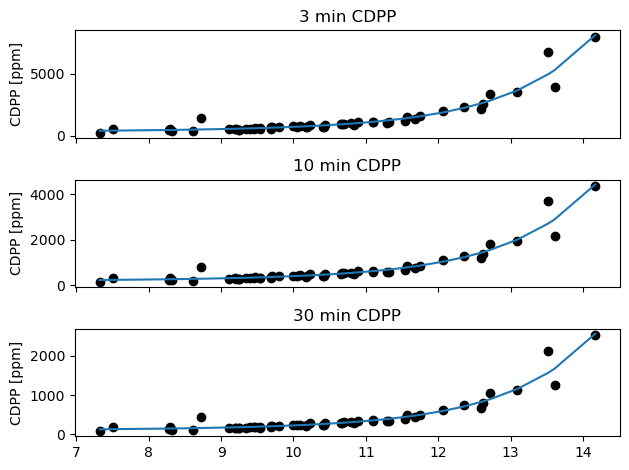

In [5]:
# cdpp values and curve fit

fig, ax = plt.subplots(nrows=3, sharex=True)
ax[0].scatter(mag, cdpp_3_min_scaled, color='k')
ax[0].plot(mag, curve_fit_3_min, '-', label='Curve Fit')
ax[0].set_title("3 min CDPP")
ax[0].set_ylabel("CDPP [ppm]")

ax[1].scatter(mag, cdpp_10_min_scaled, color='k')
ax[1].plot(mag, curve_fit_10_min, '-', label='Curve Fit')
ax[1].set_title("10 min CDPP")
ax[1].set_ylabel("CDPP [ppm]")

ax[2].scatter(mag, cdpp_30_min, color='k')
ax[2].plot(mag, curve_fit_30_min, '-', label='Curve Fit')
ax[2].set_title("30 min CDPP")
ax[2].set_ylabel("CDPP [ppm]")

plt.tight_layout()
plt.show()

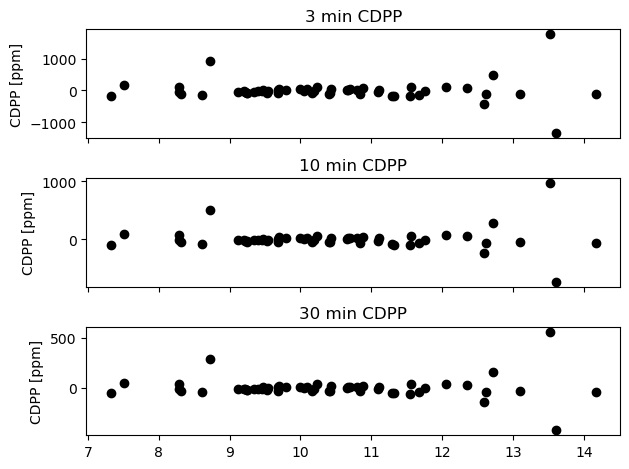

In [6]:
# magnitude corrected cdpp values

fig, ax = plt.subplots(nrows=3, sharex=True)
ax[0].scatter(mag, cdpp_3_min_scaled_corrected, color='k')
ax[0].set_title("3 min CDPP")
ax[0].set_ylabel("CDPP [ppm]")

ax[1].scatter(mag, cdpp_10_min_scaled_corrected, color='k')
ax[1].set_title("10 min CDPP")
ax[1].set_ylabel("CDPP [ppm]")

ax[2].scatter(mag, cdpp_30_min_corrected, color='k')
ax[2].set_title("30 min CDPP")
ax[2].set_ylabel("CDPP [ppm]")

plt.tight_layout()
plt.show()

In [7]:
# outliers are the same for each cdpp value

mask = np.where(np.abs(cdpp_30_min_corrected) > 2*np.std(cdpp_30_min_corrected))
outliers = sorted_df.loc[mask]
outliers

,ticid,gaia_id,group,logg,t_eff,fe_h,gaia_mag,CDPP0_5_mean,CDPP0_5_med,CDPP0_5_std,CDPP1_0_mean,CDPP1_0_med,CDPP1_0_std,CDPP2_0_mean,CDPP2_0_med,CDPP2_0_std
6,349902873,Gaia DR2 5288622449677924736,9,4.65408,8449.64,-9999.990000,8.72655,452.489244,453.378326,13.419174,482.289748,480.846527,12.824710,507.395048,506.643738,13.433004
51,271972426,Gaia DR2 5214262787527949312,1,5.01110,3545.17,-0.132069,13.51960,1998.788368,2128.830811,365.871055,1459.694655,1527.911011,262.537964,1082.484145,1112.180176,194.086990
52,306894095,Gaia DR2 5269688167956144768,1,5.01615,3516.67,-0.185839,13.60500,1249.235385,1246.513550,78.491977,908.676031,898.328918,62.272529,679.225014,651.094910,64.241506


In [8]:
# mask off outliers
mask = np.where(np.abs(cdpp_30_min_corrected) < 2*np.std(cdpp_30_min_corrected))
cdpp_3_min_scaled_corrected = cdpp_3_min_scaled_corrected[mask]
cdpp_10_min_scaled_corrected = cdpp_10_min_scaled_corrected[mask] 
cdpp_30_min_corrected = cdpp_30_min_corrected[mask]

mag = mag[mask]
temp = temp[mask]
logg = logg[mask]
fe_h = fe_h[mask]

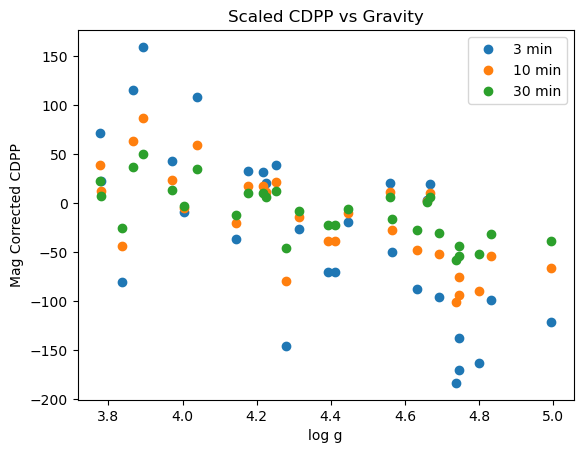

In [9]:
# logg plot for dwarfs
mask = np.where(logg > 3.5)
dwarf_logg = logg[mask]
dwarf_cdpp_3 = cdpp_3_min_scaled_corrected[mask]
dwarf_cdpp_10 = cdpp_10_min_scaled_corrected[mask]
dwarf_cdpp_30 = cdpp_30_min_corrected[mask]

plt.figure()
plt.plot(dwarf_logg, dwarf_cdpp_3, 'o', label='3 min')
plt.plot(dwarf_logg, dwarf_cdpp_10, 'o', label='10 min')
plt.plot(dwarf_logg, dwarf_cdpp_30, 'o', label='30 min')
# plt.xlim(3.5, 5.25)
# plt.ylim(-225,225)
plt.title('Scaled CDPP vs Gravity')
plt.ylabel('Mag Corrected CDPP')
plt.xlabel('log g')
plt.legend()
plt.show()

In [10]:
# fit lines to each cdpp time

In [11]:
# repeat with estimated cdpp from lightkurve method
# must import the data, and sort it based on magnitude first (like I did with the dataframe)
# then correct for magnitude (it may not follow same curve as the scaled values)
# remove outliers
# fit lines and compare plot to scaled version